<a href="https://colab.research.google.com/github/Abin-j-g7/Skillcraft_ML_04/blob/main/handGesture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abinj10","key":"f9b644d7d7a5f09adab28c66039567b3"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d gti-upm/leapgestrecog -p /content/leapgestrecog --unzip

Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
 98% 2.09G/2.13G [00:16<00:00, 119MB/s] 
100% 2.13G/2.13G [00:16<00:00, 140MB/s]


In [ ]:
import os

base_dir = "/content/leapgestrecog"
for root, dirs, files in os.walk(base_dir):
    print(root, "->", len(files), "files")
     # remove 'break' if you want to see all subfolders



/content/leapgestrecog -> 0 files
/content/leapgestrecog/leapGestRecog -> 0 files
/content/leapgestrecog/leapGestRecog/00 -> 0 files
/content/leapgestrecog/leapGestRecog/00/09_c -> 200 files
/content/leapgestrecog/leapGestRecog/00/08_palm_moved -> 200 files
/content/leapgestrecog/leapGestRecog/00/01_palm -> 200 files
/content/leapgestrecog/leapGestRecog/00/03_fist -> 200 files
/content/leapgestrecog/leapGestRecog/00/02_l -> 200 files
/content/leapgestrecog/leapGestRecog/00/05_thumb -> 200 files
/content/leapgestrecog/leapGestRecog/00/10_down -> 200 files
/content/leapgestrecog/leapGestRecog/00/06_index -> 200 files
/content/leapgestrecog/leapGestRecog/00/04_fist_moved -> 200 files
/content/leapgestrecog/leapGestRecog/00/07_ok -> 200 files
/content/leapgestrecog/leapGestRecog/07 -> 0 files
/content/leapgestrecog/leapGestRecog/07/09_c -> 200 files
/content/leapgestrecog/leapGestRecog/07/08_palm_moved -> 200 files
/content/leapgestrecog/leapGestRecog/07/01_palm -> 200 files
/content/leapg

In [ ]:
import tensorflow as tf
import os

# -------------------------
# 1. Paths and Parameters
# -------------------------
data_dir = "/content/leapgestrecog/leapGestRecog"  # adjust if needed
img_size = (64, 64)
batch_size = 32
seed = 42

# -------------------------
# 2. Load Dataset
# -------------------------
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.2,
    subset="training",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.2,
    subset="validation",
    seed=seed,
    image_size=img_size,
    batch_size=batch_size
)

# -------------------------
# 3. Extract Class Names BEFORE mapping
# -------------------------
class_names = train_ds.class_names
print("Classes:", class_names)

# -------------------------
# 4. Data Augmentation + Normalization
# -------------------------
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))
val_ds = val_ds.map(lambda x, y: (x/255.0, y))

# -------------------------
# 5. Optimize Pipeline
# -------------------------
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("✅ Dataset ready! Train and validation sets prepared.")


Found 20000 files belonging to 10 classes.
Using 16000 files for training.
Found 20000 files belonging to 10 classes.
Using 4000 files for validation.
Classes: ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']
✅ Dataset ready! Train and validation sets prepared.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 60, 60, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 60, 60, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 26, 26, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 11, 11, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 9, 9, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 9, 9, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 816,938 (3.12 MB)

 Trainable params: 815,530 (3.11 MB)

 Non-trainable params: 1,408 (5.50 KB)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 388s 764ms/step - accuracy: 0.3447 - loss: 2.1378 - val_accuracy: 0.4042 - val_loss: 3.1777
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 344s 689ms/step - accuracy: 0.7727 - loss: 0.6422 - val_accuracy: 0.8780 - val_loss: 0.2741
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 371s 742ms/step - accuracy: 0.8850 - loss: 0.3302 - val_accuracy: 0.8615 - val_loss: 0.3862
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 381s 763ms/step - accuracy: 0.9304 - loss: 0.2045 - val_accuracy: 0.8733 - val_loss: 0.3935
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 386s 772ms/step - accuracy: 0.9445 - loss: 0.1551 - val_accuracy: 0.9743 - val_loss: 0.0673
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 142ms/step - accuracy: 0.9755 - loss: 0.0665
✅ Validation Accuracy: 97.43%
Model saved as my_model.keras
Model reloaded successfully!


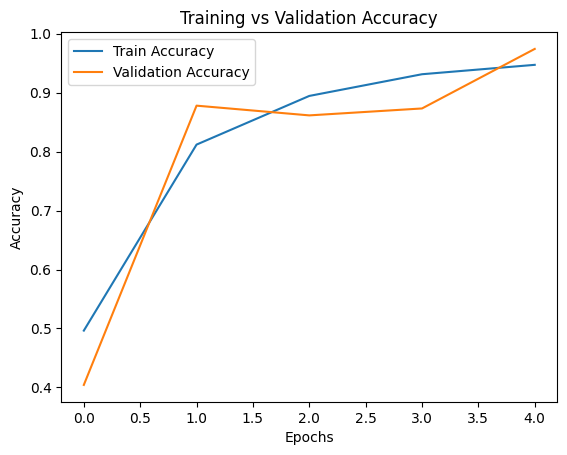

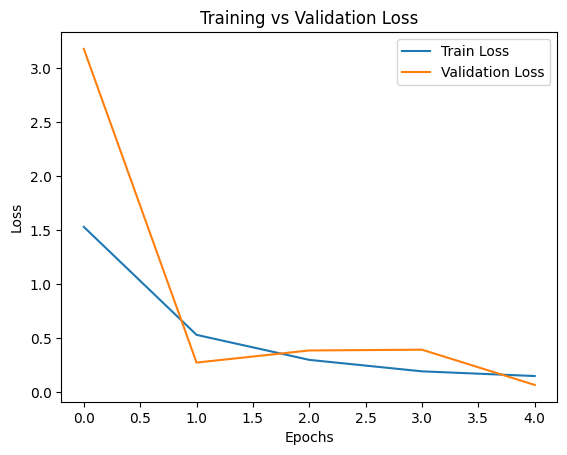

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import matplotlib.pyplot as plt

# -------------------------
# 1. Build Deep CNN Model
# -------------------------
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 gesture classes
])

# -------------------------
# 2. Compile Model
# -------------------------
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# -------------------------
# 3. Callbacks
# -------------------------
early_stop = callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
checkpoint = callbacks.ModelCheckpoint("best_model.keras", monitor='val_accuracy', save_best_only=True)


# -------------------------
# 4. Train Model
# -------------------------
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    verbose=1,
    callbacks=[early_stop, checkpoint]
)

# -------------------------
# 5. Evaluate Model
# -------------------------
val_loss, val_acc = model.evaluate(val_ds)
print(f"✅ Validation Accuracy: {val_acc*100:.2f}%")

# -------------------------
# 6. Save Model
# -------------------------
model.save("my_model.keras")   # ✅ recommended format
print("Model saved as my_model.keras")

# -------------------------
# 7. Reload Model (if needed)
# -------------------------
loaded_model = tf.keras.models.load_model("my_model.keras")
print("Model reloaded successfully!")

# -------------------------
# 8. Plot Training Curves
# -------------------------
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


In [ ]:
# -------------------------
# 9. Load Test Dataset
# -------------------------
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/leapgestrecog/leapGestRecog",   # dataset path
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(64, 64),
    shuffle=False,
    validation_split=0.2,
    subset="validation",   # use the same split but keep as test
    seed=42
)

# -------------------------
# 10. Evaluate on Test Set
# -------------------------
test_loss, test_acc = model.evaluate(test_ds)
print(f"🧪 Test Accuracy: {test_acc*100:.2f}%")
print(f"🧪 Test Loss: {test_loss:.4f}")


Found 20000 files belonging to 10 classes.
Using 4000 files for validation.
125/125 ━━━━━━━━━━━━━━━━━━━━ 31s 246ms/step - accuracy: 0.0000e+00 - loss: 2721.0828
🧪 Test Accuracy: 0.00%
🧪 Test Loss: 3051.5039


In [ ]:
import tensorflow as tf

data_dir = "/content/leapgestrecog/leapGestRecog"

# Train: 70%, Validation: 15%, Test: 15%
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.30,   # Reserve 30% for val+test
    subset="training",
    seed=123,
    image_size=(64, 64),
    batch_size=32
)

val_test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.30,
    subset="validation",
    seed=123,
    image_size=(64, 64),
    batch_size=32
)

# Now split val_test_ds into 2 parts: validation (50%) and test (50%)
val_batches = int(0.5 * len(val_test_ds))  # half for validation

val_ds = val_test_ds.take(val_batches)
test_ds = val_test_ds.skip(val_batches)

print("✅ Train batches:", len(train_ds))
print("✅ Validation batches:", len(val_ds))
print("✅ Test batches:", len(test_ds))


Found 20000 files belonging to 10 classes.
Using 14000 files for training.
Found 20000 files belonging to 10 classes.
Using 6000 files for validation.
✅ Train batches: 438
✅ Validation batches: 94
✅ Test batches: 94


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,
    verbose=1,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 332s 757ms/step - accuracy: 0.9559 - loss: 0.1369 - val_accuracy: 0.9904 - val_loss: 0.0162
Epoch 2/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 328s 749ms/step - accuracy: 0.9903 - loss: 0.0265 - val_accuracy: 0.9900 - val_loss: 0.0162
Epoch 3/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 421s 838ms/step - accuracy: 0.9899 - loss: 0.0233 - val_accuracy: 0.9920 - val_loss: 0.0124
Epoch 4/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 366s 801ms/step - accuracy: 0.9892 - loss: 0.0231 - val_accuracy: 0.9940 - val_loss: 0.0112
Epoch 5/5
438/438 ━━━━━━━━━━━━━━━━━━━━ 385s 807ms/step - accuracy: 0.9896 - loss: 0.0217 - val_accuracy: 0.9934 - val_loss: 0.0123


In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"🧪 Final Test Accuracy: {test_acc*100:.2f}%")


94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 193ms/step - accuracy: 0.9931 - loss: 0.0115
🧪 Final Test Accuracy: 99.23%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step


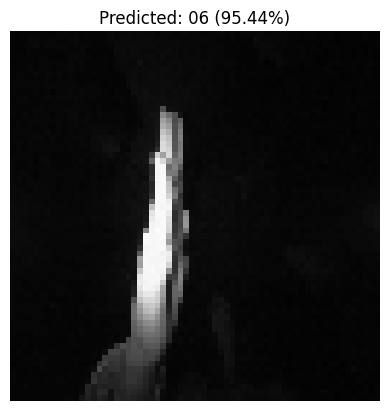

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import random

# Class names (same as your dataset folders)
class_names = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']

# Pick a random image from dataset
img_path = random.choice(tf.io.gfile.glob("/content/leapgestrecog/leapGestRecog/*/*/*.png"))

# Load and preprocess
img = tf.keras.utils.load_img(img_path, target_size=(64, 64))
img_array = tf.keras.utils.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # normalize

# Prediction
pred = model.predict(img_array)
pred_class = class_names[np.argmax(pred)]
confidence = np.max(pred) * 100

# Show result
plt.imshow(img)
plt.title(f"Predicted: {pred_class} ({confidence:.2f}%)")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

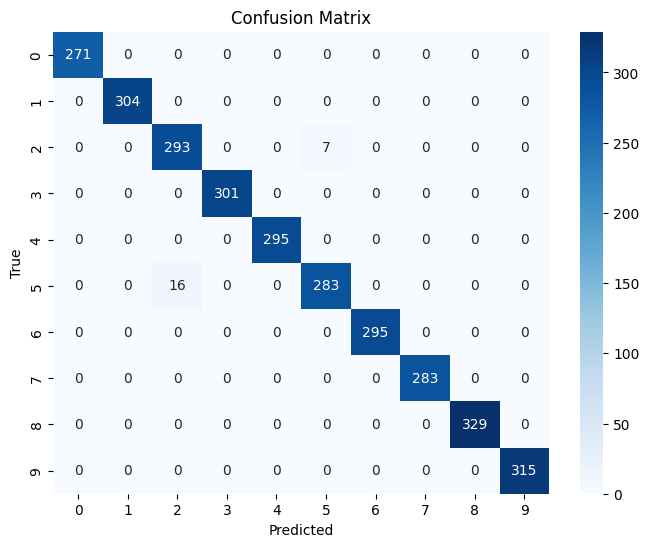

Classification Report:

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       271
           1     1.0000    1.0000    1.0000       304
           2     0.9482    0.9767    0.9622       300
           3     1.0000    1.0000    1.0000       301
           4     1.0000    1.0000    1.0000       295
           5     0.9759    0.9465    0.9610       299
           6     1.0000    1.0000    1.0000       295
           7     1.0000    1.0000    1.0000       283
           8     1.0000    1.0000    1.0000       329
           9     1.0000    1.0000    1.0000       315

    accuracy                         0.9923      2992
   macro avg     0.9924    0.9923    0.9923      2992
weighted avg     0.9924    0.9923    0.9923      2992



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# -------------------------
# 1. Get predictions on test set
# -------------------------
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# -------------------------
# 2. Confusion Matrix
# -------------------------
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# -------------------------
# 3. Classification Report
# -------------------------
print("Classification Report:\n")
print(classification_report(y_true, y_pred, digits=4))


94/94 ━━━━━━━━━━━━━━━━━━━━ 28s 190ms/step


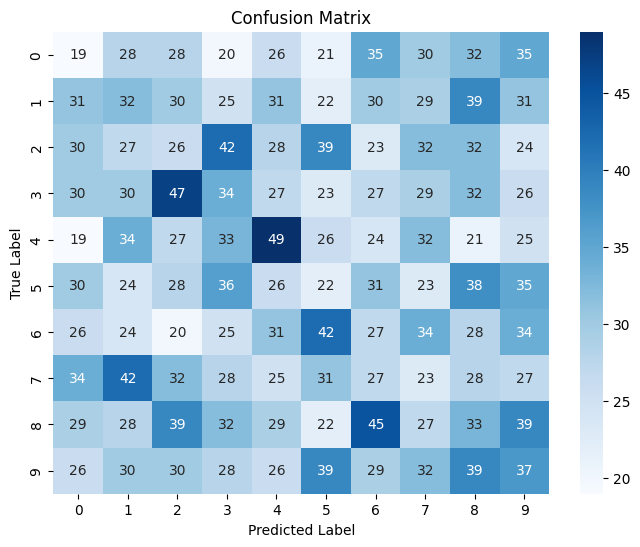

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Confusion Matrix
# -------------------------
# true labels
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# predicted labels
y_pred = np.argmax(model.predict(test_ds), axis=1)

# compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           0       0.07      0.07      0.07       274
           1       0.11      0.11      0.11       300
           2       0.08      0.09      0.09       303
           3       0.11      0.11      0.11       305
           4       0.16      0.17      0.17       290
           5       0.08      0.08      0.08       293
           6       0.09      0.09      0.09       291
           7       0.08      0.08      0.08       297
           8       0.10      0.10      0.10       323
           9       0.12      0.12      0.12       316

    accuracy                           0.10      2992
   macro avg       0.10      0.10      0.10      2992
weighted avg       0.10      0.10      0.10      2992



94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 184ms/step


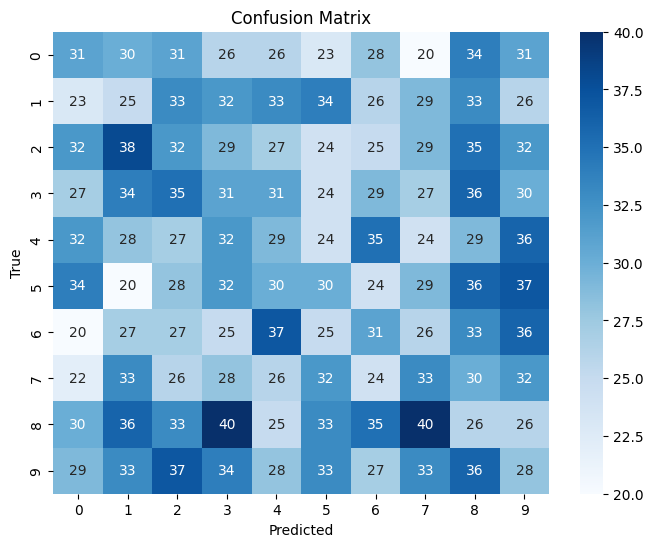


Classification Report:

              precision    recall  f1-score   support

           0     0.1107    0.1107    0.1107       280
           1     0.0822    0.0850    0.0836       294
           2     0.1036    0.1056    0.1046       303
           3     0.1003    0.1020    0.1011       304
           4     0.0993    0.0980    0.0986       296
           5     0.1064    0.1000    0.1031       300
           6     0.1092    0.1080    0.1086       287
           7     0.1138    0.1154    0.1146       286
           8     0.0793    0.0802    0.0798       324
           9     0.0892    0.0881    0.0886       318

    accuracy                         0.0989      2992
   macro avg     0.0994    0.0993    0.0993      2992
weighted avg     0.0990    0.0989    0.0990      2992



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# ✅ Get predictions on test set
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# ✅ Get true labels
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# -------------------------
# Confusion Matrix
# -------------------------
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# -------------------------
# Classification Report
# -------------------------
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, digits=4))


In [22]:
import numpy as np

# Get predictions
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# Extract true labels from test_ds
y_true = np.concatenate([labels.numpy() for _, labels in test_ds], axis=0)

print("Shapes -> y_true:", y_true.shape, "y_pred:", y_pred.shape)


94/94 ━━━━━━━━━━━━━━━━━━━━ 32s 267ms/step
Shapes -> y_true: (2992,) y_pred: (2992,)


94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 182ms/step


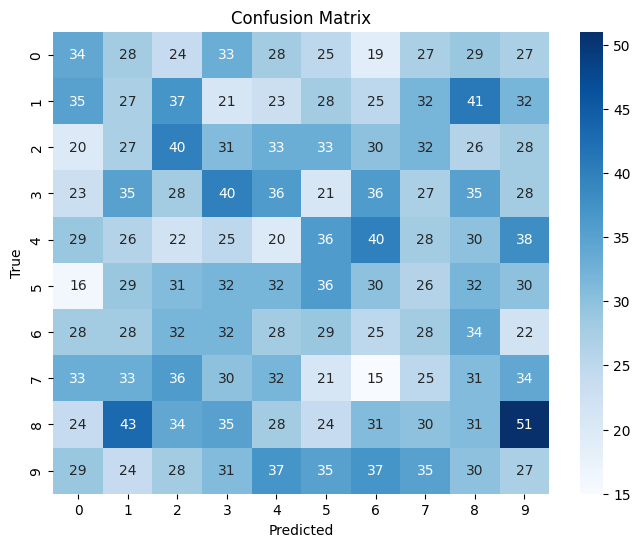


Classification Report:

              precision    recall  f1-score   support

           0     0.1255    0.1241    0.1248       274
           1     0.0900    0.0897    0.0899       301
           2     0.1282    0.1333    0.1307       300
           3     0.1290    0.1294    0.1292       309
           4     0.0673    0.0680    0.0677       294
           5     0.1250    0.1224    0.1237       294
           6     0.0868    0.0874    0.0871       286
           7     0.0862    0.0862    0.0862       290
           8     0.0972    0.0937    0.0954       331
           9     0.0852    0.0863    0.0857       313

    accuracy                         0.1019      2992
   macro avg     0.1020    0.1021    0.1020      2992
weighted avg     0.1019    0.1019    0.1019      2992



In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# ✅ Get predictions on test set
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

# ✅ Get true labels
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# -------------------------
# Confusion Matrix
# -------------------------
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# -------------------------
# Classification Report
# -------------------------
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, digits=4))


In [24]:
# Check first 20 predictions vs true labels
for i, (image, label) in enumerate(test_ds.unbatch().take(20)):
    pred_prob = model.predict(tf.expand_dims(image, axis=0))
    pred = np.argmax(pred_prob)
    print(f"True: {label.numpy()} | Predicted: {pred}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
True: 6 | Predicted: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
True: 2 | Predicted: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
True: 0 | Predicted: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
True: 1 | Predicted: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
True: 9 | Predicted: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
True: 2 | Predicted: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
True: 8 | Predicted: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
True: 6 | Predicted: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
True: 9 | Predicted: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
True: 2 | Predicted: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
True: 2 | Predicted: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
True: 8 | Predicted: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
True: 4 | Predicted: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
True: 4 | Predicted: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
True: 7 | Predicted: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
True: 6 | Predicted: 6
1/1 ━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

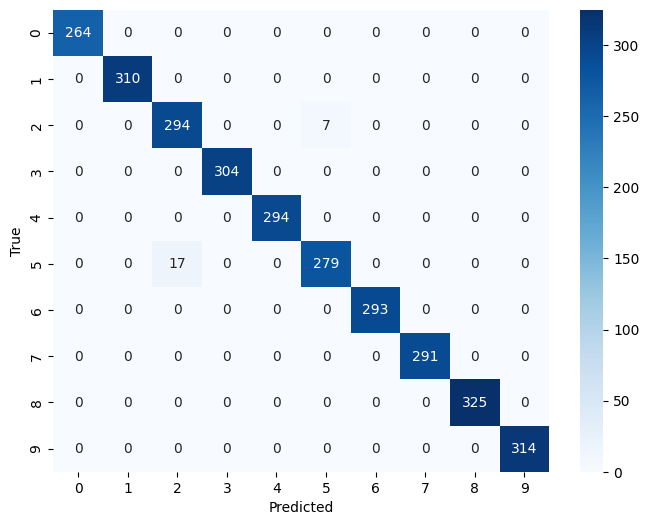

In [25]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Classification Report
print(classification_report(y_true, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
